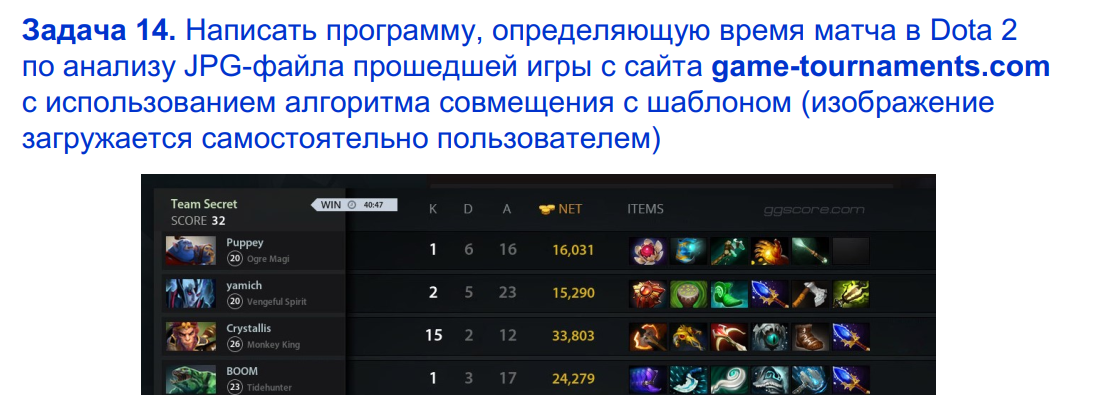

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
number_list = []
number_list.append(cv.imread("0.png", 0))
number_list.append(cv.imread("1.png", 0))
number_list.append(cv.imread("2.png", 0))
number_list.append(cv.imread("3.png", 0))
number_list.append(cv.imread("4.png", 0))
number_list.append(cv.imread("5.png", 0))
number_list.append(cv.imread("6.png", 0))
number_list.append(cv.imread("7.png", 0))
number_list.append(cv.imread("8.png", 0))
number_list.append(cv.imread("9.png", 0))

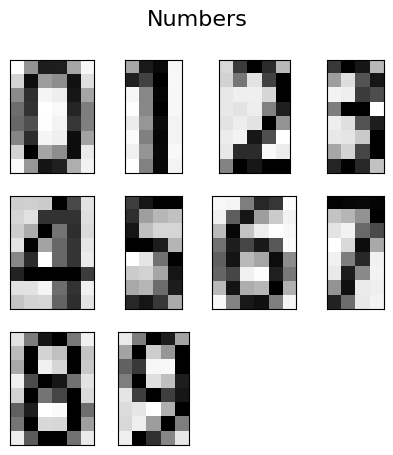

In [3]:
fig, ax = plt.subplots(3, 4, figsize=(5, 5))
fig.suptitle('Numbers', fontsize=16)
for i, axi in enumerate(ax.flat):
    if (i < 10):
        axi.imshow(number_list[i], cmap='gray')
        axi.set(xticks=[], yticks=[])
fig.delaxes(ax[2,2])
fig.delaxes(ax[2,3])
plt.show()

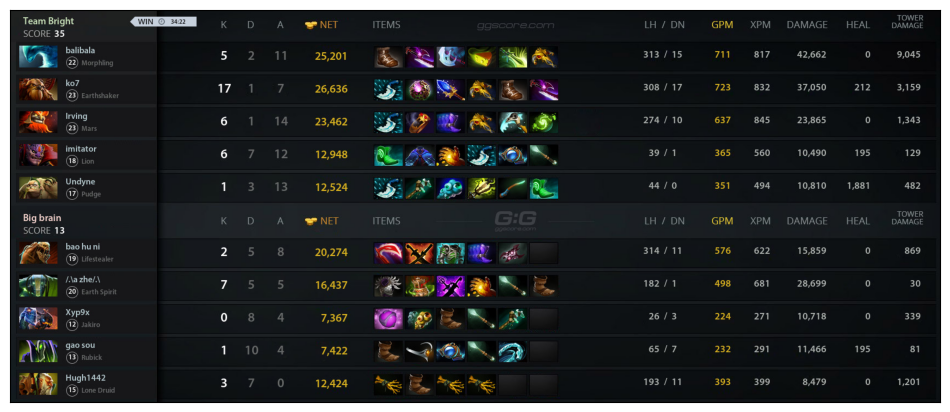

In [4]:
image = cv.imread('dota.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

template = cv.imread('win.jpeg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"

colon_template = cv.imread('dev.jpeg', 0)

method = eval('cv.TM_CCOEFF_NORMED')

plt.figure(figsize=(12,12))
plt.imshow(image_rgb), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
class Template:
    def __init__(self, number, coord, template, is_colon = False):
        self.number = number
        self.coord = coord
        self.template = template
        self.is_colon = is_colon

def num_compare(f, s):
    if (f.coord[0][0] < s.coord[0][0]):
        return -1
    elif (f.coord[0][0] > s.coord[0][0]):
        return 1
    else:
        return 0

In [13]:
def get_borders(img, template, method):
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img.copy(), template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method == 'cv.TM_SQDIFF' or method == 'cv.TM_SQDIFF_NORMED':
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    return top_left, bottom_right

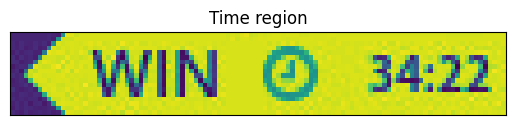

In [14]:
top_left, bottom_right = get_borders(gray, template, method)
#image ROI (y,x)
width=35
time_location = gray[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]+width]

plt.title('Time region')
plt.imshow(time_location), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
from functools import cmp_to_key

def find_number(img, template, method, threshold = 0.95):
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img.copy(), template, method)
    loc = np.where( res >= threshold)
    nums = []
    for pt in zip(*loc[::-1]):
        nums.append((pt, (pt[0] + w, pt[1] + h))) 
    return nums

def get_time(number_list, time_location, method):
    numbers_on_pic = []
    for idx, number in enumerate(number_list):
        nums = find_number(time_location, number, method)
        for num in nums:            
            numbers_on_pic.append(Template(idx, num, number))
            
    nums = find_number(time_location, colon_template, method)
    for num in nums:
        numbers_on_pic.append(Template(-1, num, colon_template, True))        
    numbers_on_pic = sorted(numbers_on_pic, key=cmp_to_key(num_compare))
    
    ftl, fbr = get_borders(time_location, numbers_on_pic[0].template, method)
    ltl, lbr = get_borders(time_location, numbers_on_pic[-1].template, method)
    plt.imshow(time_location[ftl[1]: fbr[1], ftl[0]:lbr[0]+6]), plt.xticks([]), plt.yticks([])
    plt.show()

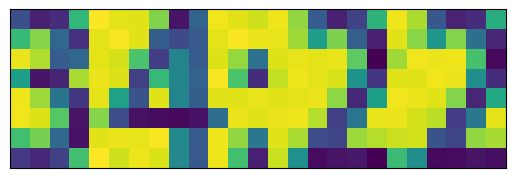

In [16]:
get_time(number_list, time_location, method)